In [1]:
import os

file_dir = r"Sources"
files_list = os.listdir(file_dir)
for file_name in files_list:
    if file_name.split('.')[-1] == 'inp':
        print(file_name)
        read_lines_txt = open(file_dir+'\\'+file_name).readlines()
    elif file_name.split('.')[-1] == 'csv':
        read_lines_csv = open(file_dir+'\\'+file_name).readlines()
# Read txt node info
range_node_line = []
range_ele_line=[]
for i in range(len(read_lines_txt)):
    if read_lines_txt[i] == '*NODE, NSET=NALL\n':
        range_node_line.append(i+1)
    elif read_lines_txt[i] == '**         Elements\n':
        range_node_line.append(i-1)
        range_ele_line.append(i+2)
    elif read_lines_txt[i] == '**         Element sets\n':
        range_ele_line.append(i-1)
        

node_num = []
node_x = []
node_y = []
node_z = []
for node_lines_num in range(range_node_line[0], range_node_line[-1]):
    node_coor_line = read_lines_txt[node_lines_num]
    node_info = node_coor_line.split(' ')
    node_num.append(node_info[0])
    node_x.append(float(node_info[1].split(',')[0]))
    node_y.append(float(node_info[2].split(',')[0]))
    node_z.append(float(node_info[3]))

ele_info = {}
ele_lines_begin = range_ele_line[0]
for ele_lines_num in range(range_ele_line[0], range_ele_line[-1]):
    ele_line = read_lines_txt[ele_lines_num].split(' ')
    ele_info[int(ele_line[0].split(',')[0])] = [int(ele_line[1].split(',')[0]), int(ele_line[2].split(',')[0]), 
                                                int(ele_line[3].split(',')[0]), int(ele_line[4].split(',')[0]),
                                                int(ele_line[5].split(',')[0]), int(ele_line[6].split(',')[0]),
                                                int(ele_line[7].split(',')[0]), int(ele_line[8].split(',')[0])]

# Read csv centroid point info and metric values

read_line_csv = len(read_lines_csv)
ele_centroid_x = []
ele_centroid_y = []
ele_centroid_z = []
metric_value = {}
ele_num = 0 
for csv_line_num in range(len(read_lines_csv)):
    # print(read_lines_csv[csv_line_num])
    
    if csv_line_num > 1:
        ele_num += 1
        read_line_csv = read_lines_csv[csv_line_num].split(',')
        ele_centroid_x.append(float(read_line_csv[0]))
        ele_centroid_y.append(float(read_line_csv[1]))
        ele_centroid_z.append(float(read_line_csv[2]))
        metric_value[ele_num] = float(read_line_csv[3])

Metric 09.inp


Create VTK files based on results obtained from .csv and .txt files

In [2]:
vtk_dir = 'Results'
vtk_file_name = 'Metric 01.vtk'
vtk_file = open(vtk_dir + '\\' + vtk_file_name, 'w')
vtk_file.write('# vtk DataFile Version 2.0\n')
vtk_file.write('Unstructured Grid - est_sources/Job-1\n')
vtk_file.write('ASCII\n\n')
vtk_file.write('DATASET UNSTRUCTURED_GRID\n')
vtk_file.write('POINTS ' + str(len(node_x)) + ' float\n')
for node_num in range(len(node_x)):
    vtk_file.write(str(node_x[node_num]) + ' ' + str(node_y[node_num]) + ' ' + str(node_z[node_num]) + '\n')
vtk_file.write('\nCELLS ' + str(len(ele_info)) + ' ' + str(len(ele_info)*9) + '\n')
for ele_num_order in range(len(ele_info)):
    vtk_file.write('8 ' + str(ele_info[ele_num_order+1]).replace('[', '').replace(']', '') + '\n')
    
vtk_file.write('\nCELL_TYPES ' + '12\n')
for i in range(ele_num):
    vtk_file.write('12\n')
vtk_file.close()

Create data analysis for metric values

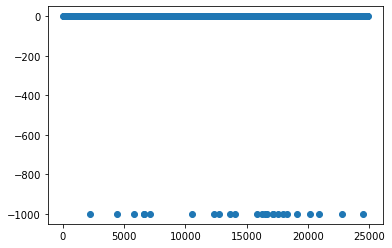

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

ele_num_list = []
ele_metric_value = []
ele_centroid_coordinate = {}
for i in range(ele_num):
    if metric_value[i+1] < 0.9:
        ele_num_list.append(i)
        ele_metric_value.append(metric_value[i+1])
        ele_centroid_coordinate[i] = [ele_centroid_x[i], ele_centroid_y[i], ele_centroid_z[i]]
# print(ele_metric_value)
plt.scatter(ele_num_list, ele_metric_value)
plt.show()

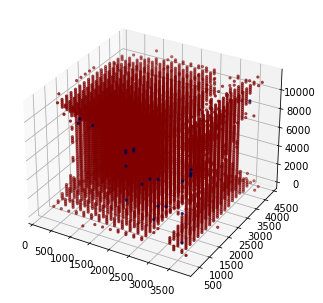

In [4]:
%matplotlib inline

import math
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ele_centroid_x_sorted = []
ele_centroid_y_sorted = []
ele_centroid_z_sorted = []


for i in ele_centroid_coordinate:
    ele_centroid_x_sorted.append(ele_centroid_coordinate[i][0])
    ele_centroid_y_sorted.append(ele_centroid_coordinate[i][1])
    ele_centroid_z_sorted.append(ele_centroid_coordinate[i][2])
# print(ele_centroid_y_sorted)
# print(ele_centroid_z_sorted)
# print(metric_value)
col = []
for i in range(len(ele_metric_value)):
    # print((metric_value[i+1]))
    col.append(float(ele_metric_value[i]))

    
    
col = [0 if math.isnan(x) else x for x in col]
min_v = min(col)
max_v = max(col)
color = [plt.get_cmap("seismic", 100)(int(float(i-min_v)/(max_v-min_v)*100)) for i in col]
ax.scatter(ele_centroid_x_sorted, ele_centroid_y_sorted, ele_centroid_z_sorted, c=color, marker='.')
